# Importação do Pandas e do arquivo CSV




In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import NearMiss 
from collections import Counter
from imblearn.under_sampling import NearMiss 
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Challenge Dados 1/Dados em CSV/exportacao.csv")

# Visualização Cabeçalho ee exclusão de campos desnecessários

In [4]:
dataset.head(10)

,ID_PESSOAL,ID_EMPRESTIMO,ID_HISTORICO,IDADE,SALARIO_ANUAL,PROP_SITUACAO,TEMPO_TRAB,INTENCAO_EMPRESTIMO,GRAU_EMPRESTIMO,VALOR_TOTAL,TAXA_JUROS,POSSIB_INADIMPLENTE,PERCENTUAL_RENDIMENTO_EMPRESTIMO,PESSOA_INADIMPLENTE,TEMPO_AQUISICAO
0,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,27.0,68000.0,Rent,4.0,Homeimprovement,A,8700.0,7.88,0.0,0.13,N,5
1,RSQpYv0W-D6Oo,PDpdl2hQ-Sszr,oZ2iPvfD-HdIo,24.0,12600.0,Rent,2.0,Venture,C,2500.0,13.11,1.0,0.20,Y,2
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,30.0,100000.0,Rent,13.0,Debtconsolidation,A,12000.0,7.88,0.0,0.12,N,9
3,d0YRlkdZ-nuLT,xzTEiD3e-BbFZ,Z5LA433k-5vqf,28.0,83000.0,Mortgage,6.0,Debtconsolidation,B,5000.0,NaN,0.0,0.06,N,9
4,njGBnugm-85Dv,QKDlpIm7-sqMC,ObEkaKZr-9MDa,30.0,110400.0,Rent,1.0,Venture,D,14000.0,16.89,1.0,0.13,N,6
5,ZZ41xYZt-oZch,txgCHDym-TG6Q,fHIsaQH4-ELgM,31.0,26988.0,Rent,NaN,Venture,A,5800.0,6.62,0.0,0.21,N,9
6,GN6ytQnE-DzMK,WbeWEny4-1t34,mMtKwh3x-cEpY,24.0,117996.0,Mortgage,6.0,Venture,E,18000.0,17.04,0.0,0.15,Y,3
7,Rb8k12Zq-S58b,L88dgHTW-gh06,JyLwW0Ov-t1oB,27.0,24000.0,Rent,2.0,Medical,A,1450.0,NaN,0.0,0.06,N,9
8,TccooMuS-9WMJ,R3iJsWIz-nEQ2,tgWAqObp-d8sA,21.0,21600.0,Rent,NaN,Debtconsolidation,A,6700.0,6.92,1.0,0.31,N,4
9,hUTCf2mg-Lsiq,X1iMYKFZ-Y9vt,CzgF8dqS-nkOH,21.0,26400.0,Rent,NaN,Personal,D,7000.0,14.84,1.0,0.27,Y,3


In [5]:
dataset.drop(['ID_EMPRESTIMO', 'ID_HISTORICO', 'GRAU_EMPRESTIMO', 'ID_PESSOAL'], axis = 'columns', inplace = True)

In [6]:
#Informações sobre o dataset
#Vemos que temos, pela quantidade de dados nulos:
#ID_PESSOAL: 1, SALARIO_ANUAL: 9, PROP_SITUACAO: 11,  VALOR_TOTAL: 7, TAXA_JUROS: 105, POSSIB_INADIMPLENTE: 10, PERCENTUAL_RENDIMENTO_EMPRESTIMO: 16, PESSOA_INADIMPLENTE: 8, TEMPO_AQUISICAO: 0        
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IDADE                             991 non-null    float64
 1   SALARIO_ANUAL                     991 non-null    float64
 2   PROP_SITUACAO                     989 non-null    object 
 3   TEMPO_TRAB                        972 non-null    float64
 4   INTENCAO_EMPRESTIMO               991 non-null    object 
 5   VALOR_TOTAL                       993 non-null    float64
 6   TAXA_JUROS                        895 non-null    float64
 7   POSSIB_INADIMPLENTE               990 non-null    float64
 8   PERCENTUAL_RENDIMENTO_EMPRESTIMO  984 non-null    float64
 9   PESSOA_INADIMPLENTE               992 non-null    object 
 10  TEMPO_AQUISICAO                   1000 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


# Tratamento de nulos e repetidos

---
Exclusão de colunas desnecessárias e linhas nulas para nossa aplicação. Também substituição dos dados nulos por 0 no campo "TAXA_JUROS".


In [7]:
#Chamando um dataframe onde PERCENTUAL_RENDIMENTO_EMPRESTIMO é nulo
dataset[dataset['PERCENTUAL_RENDIMENTO_EMPRESTIMO'].isnull()]

,IDADE,SALARIO_ANUAL,PROP_SITUACAO,TEMPO_TRAB,INTENCAO_EMPRESTIMO,VALOR_TOTAL,TAXA_JUROS,POSSIB_INADIMPLENTE,PERCENTUAL_RENDIMENTO_EMPRESTIMO,PESSOA_INADIMPLENTE,TEMPO_AQUISICAO
72,30.0,34000.0,Rent,0.0,Medical,6500.0,16.32,0.0,NaN,NaN,10
80,24.0,29232.0,Mortgage,1.0,NaN,6000.0,NaN,1.0,NaN,N,3
205,25.0,74800.0,Rent,2.0,Medical,5000.0,12.69,NaN,NaN,N,3
223,36.0,69000.0,Rent,20.0,Venture,12000.0,NaN,0.0,NaN,N,2
227,37.0,35000.0,NaN,NaN,Medical,14900.0,13.57,0.0,NaN,N,3
281,NaN,70000.0,Rent,5.0,Education,13225.0,16.11,0.0,NaN,Y,7
289,NaN,83400.0,Mortgage,2.0,Debtconsolidation,2200.0,7.49,1.0,NaN,N,6
346,24.0,24000.0,NaN,0.0,Venture,7000.0,10.38,0.0,NaN,N,4
448,26.0,26400.0,Own,8.0,NaN,17000.0,7.88,1.0,NaN,N,6
507,25.0,125000.0,Mortgage,5.0,NaN,8000.0,16.35,0.0,NaN,Y,5


In [8]:
#Excluindo dataframe que PERCENTUAL_RENDIMENTO_EMPRESTIMO, SALARIO_ANUAL, VALOR_TOTAL e PESSOA_INADIMPLENTE é nulo
dataset.dropna(subset = ['PERCENTUAL_RENDIMENTO_EMPRESTIMO', 'SALARIO_ANUAL', 'VALOR_TOTAL', 'PESSOA_INADIMPLENTE'], inplace = True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IDADE                             962 non-null    float64
 1   SALARIO_ANUAL                     965 non-null    float64
 2   PROP_SITUACAO                     958 non-null    object 
 3   TEMPO_TRAB                        943 non-null    float64
 4   INTENCAO_EMPRESTIMO               959 non-null    object 
 5   VALOR_TOTAL                       965 non-null    float64
 6   TAXA_JUROS                        868 non-null    float64
 7   POSSIB_INADIMPLENTE               960 non-null    float64
 8   PERCENTUAL_RENDIMENTO_EMPRESTIMO  965 non-null    float64
 9   PESSOA_INADIMPLENTE               965 non-null    object 
 10  TEMPO_AQUISICAO                   965 non-null    int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 90.5+ KB


In [10]:
dataset.shape

(965, 11)

In [11]:
#Substituir TAXA_JUROS nulos pra 0
dataset.fillna(0, inplace = True)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IDADE                             965 non-null    float64
 1   SALARIO_ANUAL                     965 non-null    float64
 2   PROP_SITUACAO                     965 non-null    object 
 3   TEMPO_TRAB                        965 non-null    float64
 4   INTENCAO_EMPRESTIMO               965 non-null    object 
 5   VALOR_TOTAL                       965 non-null    float64
 6   TAXA_JUROS                        965 non-null    float64
 7   POSSIB_INADIMPLENTE               965 non-null    float64
 8   PERCENTUAL_RENDIMENTO_EMPRESTIMO  965 non-null    float64
 9   PESSOA_INADIMPLENTE               965 non-null    object 
 10  TEMPO_AQUISICAO                   965 non-null    int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 90.5+ KB


In [13]:
dataset.head(10)

,IDADE,SALARIO_ANUAL,PROP_SITUACAO,TEMPO_TRAB,INTENCAO_EMPRESTIMO,VALOR_TOTAL,TAXA_JUROS,POSSIB_INADIMPLENTE,PERCENTUAL_RENDIMENTO_EMPRESTIMO,PESSOA_INADIMPLENTE,TEMPO_AQUISICAO
0,27.0,68000.0,Rent,4.0,Homeimprovement,8700.0,7.88,0.0,0.13,N,5
1,24.0,12600.0,Rent,2.0,Venture,2500.0,13.11,1.0,0.20,Y,2
2,30.0,100000.0,Rent,13.0,Debtconsolidation,12000.0,7.88,0.0,0.12,N,9
3,28.0,83000.0,Mortgage,6.0,Debtconsolidation,5000.0,0.00,0.0,0.06,N,9
4,30.0,110400.0,Rent,1.0,Venture,14000.0,16.89,1.0,0.13,N,6
5,31.0,26988.0,Rent,0.0,Venture,5800.0,6.62,0.0,0.21,N,9
6,24.0,117996.0,Mortgage,6.0,Venture,18000.0,17.04,0.0,0.15,Y,3
7,27.0,24000.0,Rent,2.0,Medical,1450.0,0.00,0.0,0.06,N,9
8,21.0,21600.0,Rent,0.0,Debtconsolidation,6700.0,6.92,1.0,0.31,N,4
9,21.0,26400.0,Rent,0.0,Personal,7000.0,14.84,1.0,0.27,Y,3


# Identificação de Outliers

---
Visualização dos dados dos campos "SALÁRIO_ANUAL" com uma quantidade discrepante das demais. É aplicado um tratamento sobre esta.


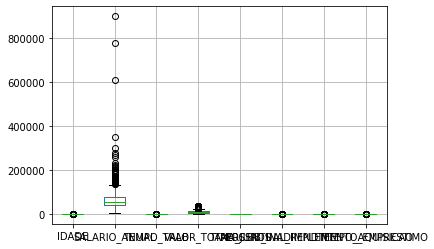

In [14]:
dataset.boxplot()

In [15]:
#Tratamento de outliers para "SALARIO_ANUAL"
valor = dataset['SALARIO_ANUAL']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [16]:
#Adicionando alteração a um novo banco chamado "dados_new"
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dataset[selecao]

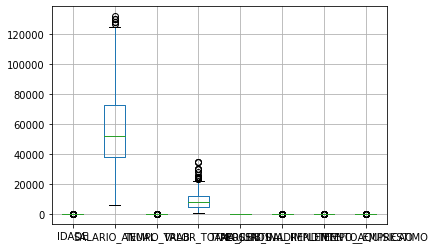

In [17]:
dados_new.boxplot()

#Enconding de variáveis categóricas

---
Substituição dos dados de "PESSOA_INADIMPLENTE" por 1 ou 0, caso _Y_ ou _N_.
Também alterando o tipo dos dados de float para int nos campos TEMPO_TRAB, POSSIB_INADIMPLENTE e IDADE.


In [18]:
dataset.head()

,IDADE,SALARIO_ANUAL,PROP_SITUACAO,TEMPO_TRAB,INTENCAO_EMPRESTIMO,VALOR_TOTAL,TAXA_JUROS,POSSIB_INADIMPLENTE,PERCENTUAL_RENDIMENTO_EMPRESTIMO,PESSOA_INADIMPLENTE,TEMPO_AQUISICAO
0,27.0,68000.0,Rent,4.0,Homeimprovement,8700.0,7.88,0.0,0.13,N,5
1,24.0,12600.0,Rent,2.0,Venture,2500.0,13.11,1.0,0.20,Y,2
2,30.0,100000.0,Rent,13.0,Debtconsolidation,12000.0,7.88,0.0,0.12,N,9
3,28.0,83000.0,Mortgage,6.0,Debtconsolidation,5000.0,0.00,0.0,0.06,N,9
4,30.0,110400.0,Rent,1.0,Venture,14000.0,16.89,1.0,0.13,N,6


In [19]:
dataset['PESSOA_INADIMPLENTE'].unique()

array(['N', 'Y'], dtype=object)

In [20]:
dataset['POSSIB_INADIMPLENTE'].unique()

array([0., 1.])

In [21]:
dataset['INTENCAO_EMPRESTIMO'].unique()

array(['Homeimprovement', 'Venture', 'Debtconsolidation', 'Medical',
       'Personal', 'Education', 0], dtype=object)

In [22]:
dataset['PROP_SITUACAO'].unique()

array(['Rent', 'Mortgage', 'Own', 0, 'Other'], dtype=object)

In [23]:
d = {'Homeimprovement': 1, 'Venture': 2, 'Debtconsolidation': 3, 'Medical': 4,
       'Personal': 5, 'Education': 6, 0: 0}
dataset['INTENCAO_EMPRESTIMO'] = dataset['INTENCAO_EMPRESTIMO'].map(d)

In [24]:
r = {"Y": 1, "N": 0}
dataset['PESSOA_INADIMPLENTE'] = dataset['PESSOA_INADIMPLENTE'].map(r)

In [25]:
s = {'Rent': 1, 'Mortgage': 2, 'Own': 3, 0: 0, 'Other': 4}
dataset['PROP_SITUACAO'] = dataset['PROP_SITUACAO'].map(s)

In [26]:
dataset['POSSIB_INADIMPLENTE'] = dataset['POSSIB_INADIMPLENTE'].astype(int)

In [27]:
dataset['IDADE'] = dataset['IDADE'].astype(int)

In [28]:
dataset['TEMPO_TRAB'] = dataset['TEMPO_TRAB'].astype(int)

In [29]:
dataset.head()

,IDADE,SALARIO_ANUAL,PROP_SITUACAO,TEMPO_TRAB,INTENCAO_EMPRESTIMO,VALOR_TOTAL,TAXA_JUROS,POSSIB_INADIMPLENTE,PERCENTUAL_RENDIMENTO_EMPRESTIMO,PESSOA_INADIMPLENTE,TEMPO_AQUISICAO
0,27,68000.0,1,4,1,8700.0,7.88,0,0.13,0,5
1,24,12600.0,1,2,2,2500.0,13.11,1,0.20,1,2
2,30,100000.0,1,13,3,12000.0,7.88,0,0.12,0,9
3,28,83000.0,2,6,3,5000.0,0.00,0,0.06,0,9
4,30,110400.0,1,1,2,14000.0,16.89,1,0.13,0,6


#Tratando desbalanceamento de dados da variável alvo

---
>Algoritmo utilizado: Near Miss


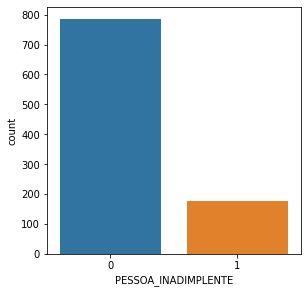

In [30]:
#A partir desse histograma, podemos ver que a variável com 0 possue bem mais dados do que com 1 
histogramas = ['PESSOA_INADIMPLENTE']
lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize= (10, 10))

for i in lista_histogramas:
  plt.subplot(2, 2, i[0]+1)
  sns.countplot(x = i[1], data = dataset)

In [31]:
dataset['PESSOA_INADIMPLENTE'].value_counts()

0    787
1    178
Name: PESSOA_INADIMPLENTE, dtype: int64

##Tratando

In [32]:
x = dataset.drop(columns = ['PESSOA_INADIMPLENTE'])
y = dataset['PESSOA_INADIMPLENTE']

In [39]:
#Separando as bases de teste e treino para nosso modelo de classificação
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state=SEED)
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]
print("A base de treino tem {} elementos e a base de teste tem {} elementos".format(base_treino, base_teste))

A base de treino tem 675 elementos e a base de teste tem 290 elementos


In [40]:
#Utilizando o algoritmo Near Miss para balanceamento da variável alvo
nr = NearMiss() 
X_near, Y_near= nr.fit_resample(treino_x, treino_y.ravel()) 
c = Counter(Y_near)
for out, _ in c.items():
  points = np.where(y == out)[0]

#Treinando modelo de Classificação

---

>Algoritmo utilizado: LogisticRegression

In [55]:
#Treinando 
modelo_LR = LogisticRegression(max_iter=1000) 
modelo_LR.fit(X_near, Y_near.ravel()) 
y_pred = modelo_LR.predict(teste_x)  

#Validando Modelo

*   Score
*   Matriz de Confusão
*   Curva ROC



In [44]:
#Score
print(round(modelo_LR.score(X_near, Y_near), 2)*100)

69.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


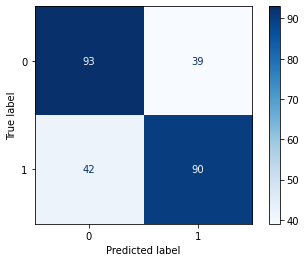

In [53]:
#Matrix de confusão 
matriz_confusao = plot_confusion_matrix(modelo_LR, X_near, Y_near, cmap='Blues', values_format='.3g')
matriz_confusao

In [56]:
print(classification_report(teste_y, y_pred)) 

              precision    recall  f1-score   support

           0       0.90      0.50      0.64       244
           1       0.21      0.72      0.33        46

    accuracy                           0.53       290
   macro avg       0.56      0.61      0.49       290
weighted avg       0.79      0.53      0.59       290



In [57]:
#Chamando a curva roc para termos mais detalhes da matriz de confusão
#tfp (Taxa falsos positivos), tvp (Taxa verdadeiros positivos)
prob_previsao = modelo_LR.predict_proba(teste_x) [:, 1]
tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('Roc_auc', roc_auc_score(teste_y, prob_previsao))

Roc_auc 0.6385424091233073


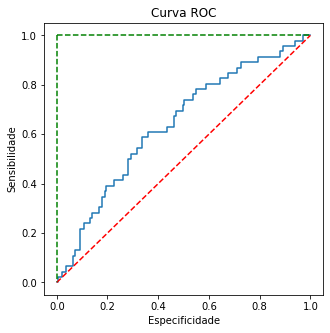

In [58]:
#Plotando nossa curva roc em um gráfico
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

#Área > 0.8 então discriminação excelente!